In the below code, we explore underlying data. As mentioned on several places, the only data source used for the project is located http://www.tennis-data.co.uk/alldata.php. Within the project we develop the data download code that handles the refresh of the underlying data - furthermore, it might be used in cron in order to establish regular refresh.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
# Loading Data
atp_data = pd.read_csv("Generated Data/atp_data.csv", low_memory = False)
atp_data["Date"] = pd.to_datetime(atp_data.Date)
print(atp_data.columns)

Index(['Tournament', 'Date', 'Court', 'Surface', 'Winner', 'Loser', 'WRank',
       'LRank', 'Wsets', 'Lsets', 'Comment', 'PSW', 'PSL', 'B365W', 'B365L',
       'WTA', 'elo_winner', 'elo_loser', 'proba_elo'],
      dtype='object')


The project's focus are major tournaments - French Open, Wimbledon, Australian Open and US Open. The reason behind choosing these tournaments is that we believe that here the noise ratio is smallest - in the smaller tournaments, we believe the ranking and player specific features are not so important (player do not pay attention to smaller tournaments etc.). On the other side, Grandslam is the most important part of the season.

In the below graph you can see numebr of matches - we can see that it truly corresponds to the Grandslam tournaments.

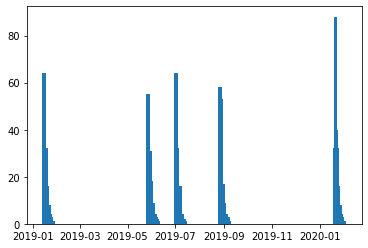

<Figure size 720x432 with 0 Axes>

In [3]:
pd.options.display.max_rows = None

data_temp = atp_data[(atp_data.Date > datetime(2019, 1, 1))]
data_temp = data_temp[(data_temp["Tournament"].isin(["French Open", "Wimbledon", "US Open", "Australian Open"]))]
data = data_temp.groupby(['Date']).size().reset_index(name = 'counts')

ax = plt.subplot()
plt.figure(figsize = (10, 6))
ax.bar("Date", "counts", width = 4, data = data)
ax.xaxis_date()

As mentioned in project description, the most important feature that is calculated is ELO ranking. It is well known methodology that is used especially within the tennis matches. The detailed description might be found on https://en.wikipedia.org/wiki/Elo_rating_system.

If we compare Players that won vs. those that lose the game, we see that there is a difference between them in terms of ELO ranking.

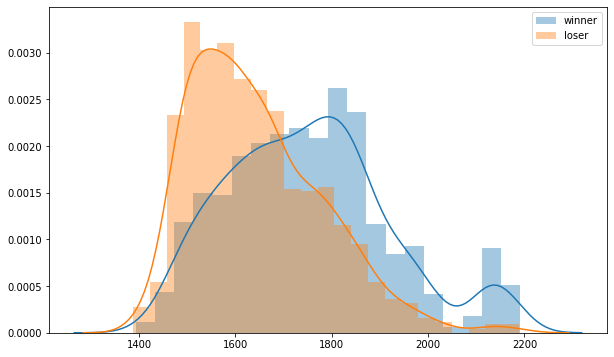

In [151]:
fig = plt.figure(figsize = (10, 6))
fig = sns.distplot(atp_data.elo_winner[(atp_data.Date > datetime(2019, 1, 1)) & (atp_data["Tournament"].isin(["French Open", "Wimbledon", "US Open", "Australian Open"]))])
fig = sns.distplot(atp_data.elo_loser[(atp_data.Date > datetime(2019, 1, 1))  & (atp_data["Tournament"].isin(["French Open", "Wimbledon", "US Open", "Australian Open"]))])
fig.legend(labels = ["winner", "loser"])
fig.set(xlabel = "")
plt.show(fig)

We see that the difference preserves also on the level of surface - i.e. Players that won a match have on average higher ELO rating.

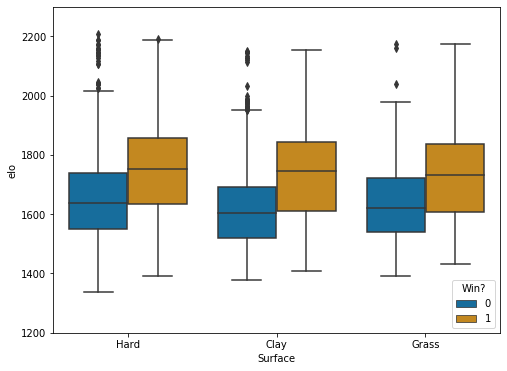

In [152]:
var = 'Surface'
data = pd.concat([atp_data['elo_winner'], atp_data[var], atp_data.Date, atp_data.Tournament], axis = 1)
data.rename(columns = {"elo_winner": "elo"}, inplace = True)
data["Win?"] = 1

data_loser = pd.concat([atp_data['elo_loser'], atp_data[var], atp_data.Date, atp_data.Tournament], axis = 1)
data_loser.rename(columns = {"elo_loser": "elo"}, inplace = True)
data_loser["Win?"] = 0
data = data[(data["Tournament"].isin(["French Open", "Wimbledon", "US Open", "Australian Open"]))]

data = data.append(data_loser)
data = data[data.Date > datetime(2019, 1, 1)]
f, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(x = var, y = "elo", data = data, palette = "colorblind", hue = "Win?")
fig.axis(ymin = 1200, ymax = 2300);

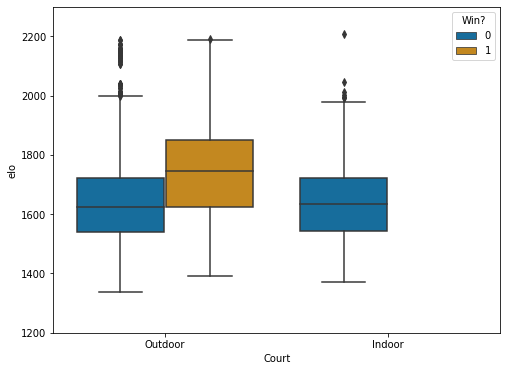

In [4]:
var = 'Court'
data = pd.concat([atp_data['elo_winner'], atp_data[var], atp_data.Date, atp_data.Tournament], axis = 1)
data.rename(columns = {"elo_winner": "elo"}, inplace = True)
data["Win?"] = 1

data_loser = pd.concat([atp_data['elo_loser'], atp_data[var], atp_data.Date, atp_data.Tournament], axis = 1)
data_loser.rename(columns = {"elo_loser": "elo"}, inplace = True)
data_loser["Win?"] = 0
data = data[(data["Tournament"].isin(["French Open", "Wimbledon", "US Open", "Australian Open"]))]

data = data.append(data_loser)
data = data[data.Date > datetime(2019, 1, 1)]
f, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(x = var, y = "elo", data = data, palette = "colorblind", hue = "Win?")
fig.axis(ymin = 1200, ymax = 2300);

We see that the difference preserves also on the level of Tournament - i.e. Players that won a match have on average higher ELO rating.

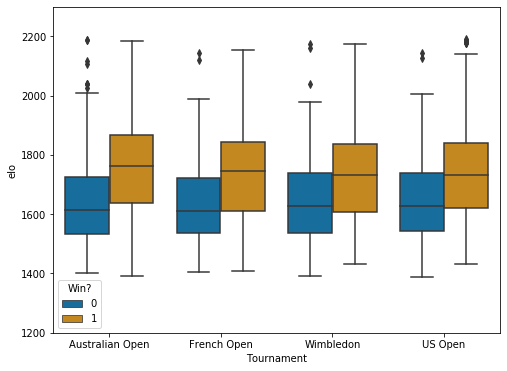

In [153]:
var = 'Tournament'
data = pd.concat([atp_data['elo_winner'], atp_data[var], atp_data.Date], axis = 1)
data.rename(columns = {"elo_winner": "elo"}, inplace = True)
data["Win?"] = 1

data_loser = pd.concat([atp_data['elo_loser'], atp_data[var], atp_data.Date], axis = 1)
data_loser.rename(columns = {"elo_loser": "elo"}, inplace = True)
data_loser["Win?"] = 0

data = data.append(data_loser)
data = data[data.Date > datetime(2019, 1, 1)]
data = data[(data["Tournament"].isin(["French Open", "Wimbledon", "US Open", "Australian Open"]))]
f, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(x = var, y = "elo", data = data, palette = "colorblind", hue = "Win?")
fig.axis(ymin = 1200, ymax = 2300);

We see that there is some sort of correlation between PS and ELO Rating - this might be quite dangerous result. Correlation in the longrun can heavily influence the profitability of the betting strategy.

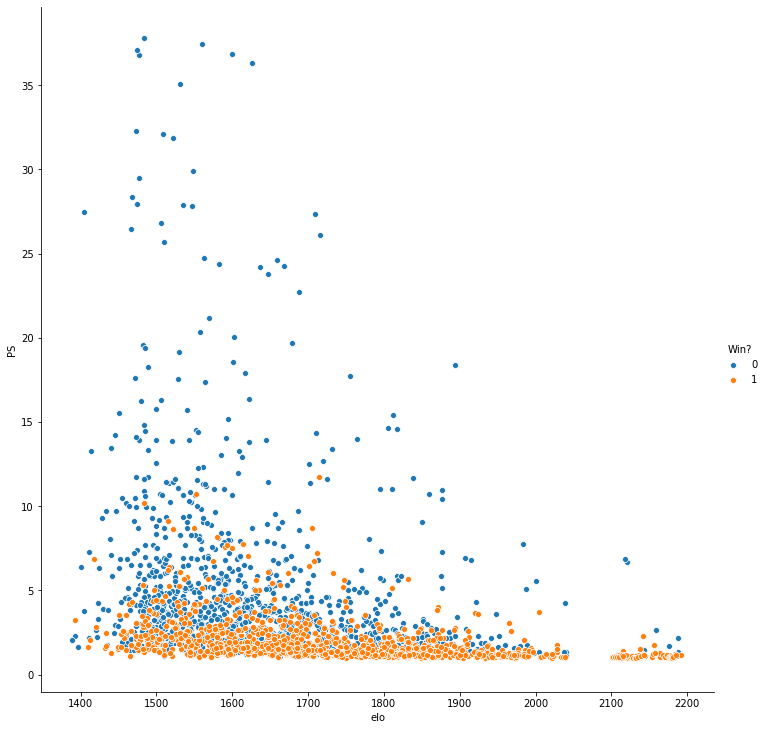

In [14]:
var = 'Tournament'
data = pd.concat([atp_data['elo_winner'], atp_data[var], atp_data.Date, atp_data.PSW], axis = 1)
data.rename(columns = {"elo_winner": "elo", "PSW":"PS"}, inplace = True)
data["Win?"] = 1

data_loser = pd.concat([atp_data['elo_loser'], atp_data[var], atp_data.Date, atp_data.PSL], axis = 1)
data_loser.rename(columns = {"elo_loser": "elo", "PSL":"PS"}, inplace = True)
data_loser["Win?"] = 0

data = data.append(data_loser)
data = data[data.Date > datetime(2019, 1, 1)]
data = data[(data["Tournament"].isin(["French Open", "Wimbledon", "US Open", "Australian Open"]))]

sns.pairplot(x_vars = ["elo"], y_vars=["PS"], data = data, hue = "Win?", size = 10)

The methodology of xgboost produced following importance plot. We see that features based on the ELO rating play important role in the tree model.

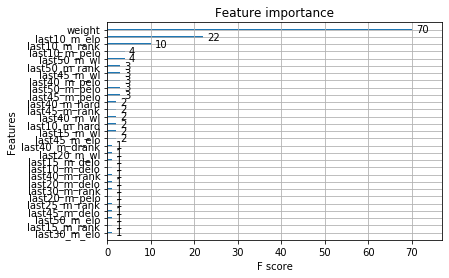

## END.